### Downloading and Unzipping the dataset

In [1]:
!rm -rf gzip*
!wget http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
!unzip gzip.zip

URL transformed to HTTPS due to an HSTS policy
--2018-05-10 09:08:23--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  65.4MB/s    in 8.7s    

2018-05-10 09:08:32 (61.3 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating:

### Loading the Test and Train Data

In [0]:
import numpy as np
import os
import gzip
import random
from collections import Counter
def load_mnist_images(path, filename):
    shape=(-1, 28*28)
    filepath=path+filename
    with gzip.open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(shape)
    return np.float32(data)

def load_mnist_labels(path, filename):
    shape=(-1, 28*28)

    filepath=path+filename
    with gzip.open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data


def load_mnist_dataset(path="./gzip/"):
    shape=(-1, 784)
    # Download and read the training and test set images and labels.
    X_train = load_mnist_images(path, 'emnist-byclass-train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels(path, 'emnist-byclass-train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images(path, 'emnist-byclass-test-images-idx3-ubyte.gz')
    y_test = load_mnist_labels(path, 'emnist-byclass-test-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:], X_train[-10000:]
    y_train, y_val = y_train[:], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32)
    X_val = np.asarray(X_val, dtype=np.float32)
    y_val = np.asarray(y_val, dtype=np.int32)
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32)
    y_test-=1
    y_train-=1
    return X_train, y_train, X_test, y_test

  
# Reading the Input  
X_train, y_train, X_test, y_test = load_mnist_dataset('./gzip/')


### Extracting 9 Upper Case Alphabets from the dataset and Normalizing the data

In [3]:
# Choosing Alphabets of English Language
charsToUse=['A','Y','U','S','H','G','P','T','R']
indexValues= [(ord(x)-56) for x in charsToUse]
# It should have been 55 but chose 56 to subtract due to labels starting from -1
print(indexValues)
# O and S have the largest number of training labels


print('X_train.shape',X_train.shape)
print("X_test.shape",X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)


# Concating labels to jumble them and filter them out
y_train=y_train[:,np.newaxis]
y_test=y_test[:,np.newaxis]
trainConcat=np.hstack((X_train,y_train))
testConcat=np.hstack((X_test,y_test))

#Filtering the chosen alphabets
print("trainConcat.shape",trainConcat.shape)
print("testConcat.shape",testConcat.shape)
def myfunc(row):
    return (row[784] in indexValues)

bool_arr = np.array([myfunc(row) for row in trainConcat])
trainConcatFiltered = trainConcat[bool_arr]
bool_arr = np.array([myfunc(row) for row in testConcat])
testConcatFiltered = testConcat[bool_arr]
print("trainConcatFiltered.shape",trainConcatFiltered.shape)
print("testConcatFiltered.shape",testConcatFiltered.shape)


# Separating the array and results
train_data_rf=trainConcatFiltered[:,0:784]
train_labels_rf=trainConcatFiltered[:,784]
test_data_rf=testConcatFiltered[:,0:784]
test_labels_rf=testConcatFiltered[:,784]
print("train_data_rf.shape",train_data_rf.shape)
print("train_labels_rf.shape",train_labels_rf.shape)
print("test_data_rf.shape",test_data_rf.shape)
print("test_labels_rf.shape",test_labels_rf.shape)

# Normalizing the data
mean_image = np.mean(train_data_rf, axis = 0)
train_data_rf -= mean_image
test_data_rf -= mean_image

from sklearn.metrics import accuracy_score
trainLabels_nn_list=Counter(train_labels_rf)
print("trainLabels_nn_list:",trainLabels_nn_list)
counterKey=0
labelHashDict={}
hashLabelDict={}
for key, value in trainLabels_nn_list.items():
  labelHashDict[key]=counterKey
  hashLabelDict[counterKey]=key
  counterKey+=1

[9, 33, 29, 27, 16, 15, 24, 28, 26]
('X_train.shape', (697932, 784))
('X_test.shape', (116323, 784))
('y_train.shape', (697932,))
('y_test.shape', (116323,))
('trainConcat.shape', (697932, 785))
('testConcat.shape', (116323, 785))
('trainConcatFiltered.shape', (73425, 785))
('testConcatFiltered.shape', (12120, 785))
('train_data_rf.shape', (73425, 784))
('train_labels_rf.shape', (73425,))
('test_data_rf.shape', (12120, 784))
('test_labels_rf.shape', (12120,))
('trainLabels_nn_list:', Counter({27.0: 20764, 29.0: 12602, 28.0: 9820, 24.0: 8347, 9.0: 6407, 26.0: 5073, 33.0: 4743, 16.0: 3152, 15.0: 2517}))


### Running a Two Layer Neural Network and Another Three Layer Neural Network with Relu in hidden Layer and Softmax Loss in final Layer, Using L2 regularization and SGD;  Nice accuracies are achieved in few epochs itself

('W[', '0', '].shape', (784, 100))
('b[', '0', '].shape', (100,))
('W[', '1', '].shape', (100, 9))
('b[', '1', '].shape', (9,))
('Accuracy', 0.23432343234323433)
('Accuracy', 0.9542079207920792)
('Accuracy', 0.9693894389438944)
('Accuracy', 0.9751650165016502)
('Accuracy', 0.9780528052805281)
('Accuracy', 0.9799504950495049)
('Accuracy', 0.9807755775577558)
('Accuracy', 0.9826732673267327)
('Accuracy', 0.9817656765676568)
('Accuracy', 0.9825907590759075)


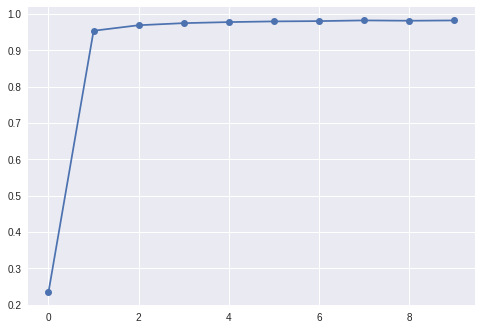

In [16]:
import copy
epoch=10
hidden_layer_nodes=[100]
numhLayers=len(hidden_layer_nodes)
output_classes=9
inputSize=784
learn_rate=0.001
learn_rate_decay=1
W={}
b={}
for i in range(numhLayers+1):
  if(i==0):
    W[str(i)]=np.random.randn(inputSize, hidden_layer_nodes[i]) * 0.0001
    b[str(i)] = np.zeros(hidden_layer_nodes[i])
  elif(i==(numhLayers)):
    W[str(i)]=np.random.randn(hidden_layer_nodes[i-1],output_classes) * 0.0001
    b[str(i)] = np.zeros(output_classes)
  else:
    W[str(i)]=np.random.randn(hidden_layer_nodes[i-1],hidden_layer_nodes[i]) * 0.0001
    b[str(i)] = np.zeros(hidden_layer_nodes[i])

epochNum=[]
accuracy=[]    
    
for i in range(numhLayers+1):
  print("W[",str(i),"].shape",W[str(i)].shape)
  print("b[",str(i),"].shape",b[str(i)].shape)
    
    
transformed_ynn_results=np.vectorize(labelHashDict.get)(test_labels_rf)

reg_param=0.0001

for abc in range(epoch):
  # print("db['1']",db['1'])
  X_nn=train_data_rf
  y_nn=train_labels_rf
  batch_size=64
  y_nn_vector=y_nn[:,np.newaxis]
  trainConcat_nn=np.hstack((X_nn,y_nn_vector))
  trainConcat_nn.shape
  np.random.shuffle(trainConcat_nn)
  
  currentShuffledTrainData=trainConcat_nn[:,0:784]
  currentShuffledLabelData=trainConcat_nn[:,784]
  
  transformed_ynn=np.vectorize(labelHashDict.get)(currentShuffledLabelData)
  
  
  h_out_test={}
  faltuVar = -1
  h_out_test[str(faltuVar)]=test_data_rf
  scoresTest=np.zeros((test_data_rf.shape[0],output_classes))
  for i in range((numhLayers+1)):
    if(i<(numhLayers)):
      h_out_test[str(i)]=np.maximum(0,h_out_test[str(i-1)].dot(W[str(i)])+b[str(i)])
    else:
      scoresTest=h_out_test[str(i-1)].dot(W[str(i)])+b[str(i)]

  y_pred = np.argmax(scoresTest, axis=1)
  
  tempAcc=accuracy_score(transformed_ynn_results, y_pred)
  
  print("Accuracy",tempAcc)
  
  epochNum.append(abc)
  accuracy.append(tempAcc)
  
  for t in range(0,(X_nn.shape[0]/batch_size)):
    if ((t*batch_size)<X_nn.size):
      X=currentShuffledTrainData[(t*batch_size):(t*batch_size)+batch_size]
      y=transformed_ynn[(t*batch_size):(t*batch_size)+batch_size]
      
      h_out={}
      h_out['-1']=X
      for i in range((numhLayers+1)):
        if(i<(numhLayers)):
          h_out[str(i)]=np.maximum(0,h_out[str(i-1)].dot(W[str(i)])+b[str(i)])
        else:
          normal_output=h_out[str(i-1)].dot(W[str(i)])+b[str(i)]
          #shift_scores = scores - 100
          clipped_softmax_overflow = normal_output - np.max(normal_output, axis = 1).reshape(-1,1)
          h_out[str(i)] = np.exp(clipped_softmax_overflow)/np.sum(np.exp(clipped_softmax_overflow), axis = 1).reshape(-1,1)
          
      dW={}
      db={}
      
      reluDerivative=None
      
      for i in range((numhLayers+1)):
        currLayer=numhLayers-i
        if(currLayer==numhLayers):
          changeInOutput = copy.deepcopy(h_out[str(currLayer)])
          changeInOutput[range(batch_size), list(y)] -= 1
          changeInOutput /= batch_size
          dW[str(currLayer)]=h_out[str(currLayer-1)].T.dot(changeInOutput) + reg_param * W[str(currLayer)]
          db[str(currLayer)]=np.sum(changeInOutput, axis = 0)
          reluDerivative=changeInOutput
        else:
          # print("currLayer",currLayer)
          dh = reluDerivative.dot(W[str(currLayer+1)].T)
          reluDerivative = (h_out[str(currLayer)] > 0) * dh
          dW[str(currLayer)]= h_out[str(currLayer-1)].T.dot(reluDerivative)+ reg_param * W[str(currLayer)]
          db[str(currLayer)]= np.sum(reluDerivative, axis = 0)
         
      for i in range(numhLayers+1):
        W[str(i)] = W[str(i)] - learn_rate * dW[str(i)]
        b[str(i)] = b[str(i)] - learn_rate * db[str(i)]
      learn_rate = learn_rate * learn_rate_decay
  
  
  
import matplotlib.pyplot as plt
plt.plot(epochNum, accuracy, '-o')
# plt.axis([0, 6, 0, 20])
plt.show()

('W[', '0', '].shape', (784, 100))
('b[', '0', '].shape', (100,))
('W[', '1', '].shape', (100, 50))
('b[', '1', '].shape', (50,))
('W[', '2', '].shape', (50, 9))
('b[', '2', '].shape', (9,))
('Accuracy', 0.09438943894389439)
('Accuracy', 0.28943894389438946)
('Accuracy', 0.28943894389438946)
('Accuracy', 0.9384488448844884)
('Accuracy', 0.9646864686468647)
('Accuracy', 0.9736798679867987)
('Accuracy', 0.9755775577557756)
('Accuracy', 0.9763201320132013)
('Accuracy', 0.9756600660066007)
('Accuracy', 0.976980198019802)


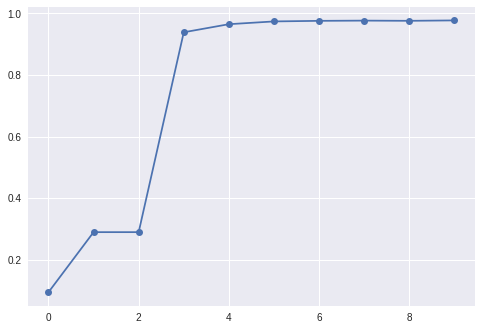

In [18]:
import copy
epoch=10
hidden_layer_nodes=[100,50]
numhLayers=len(hidden_layer_nodes)
output_classes=9
inputSize=784
learn_rate=0.005
learn_rate_decay=1
W={}
b={}
for i in range(numhLayers+1):
  if(i==0):
    W[str(i)]=np.random.randn(inputSize, hidden_layer_nodes[i]) * 0.0001
    b[str(i)] = np.zeros(hidden_layer_nodes[i])
  elif(i==(numhLayers)):
    W[str(i)]=np.random.randn(hidden_layer_nodes[i-1],output_classes) * 0.0001
    b[str(i)] = np.zeros(output_classes)
  else:
    W[str(i)]=np.random.randn(hidden_layer_nodes[i-1],hidden_layer_nodes[i]) * 0.0001
    b[str(i)] = np.zeros(hidden_layer_nodes[i])

epochNum=[]
accuracy=[]    
    
for i in range(numhLayers+1):
  print("W[",str(i),"].shape",W[str(i)].shape)
  print("b[",str(i),"].shape",b[str(i)].shape)
    
    
transformed_ynn_results=np.vectorize(labelHashDict.get)(test_labels_rf)

reg_param=0.0001

for abc in range(epoch):
  # print("db['1']",db['1'])
  X_nn=train_data_rf
  y_nn=train_labels_rf
  batch_size=64
  y_nn_vector=y_nn[:,np.newaxis]
  trainConcat_nn=np.hstack((X_nn,y_nn_vector))
  trainConcat_nn.shape
  np.random.shuffle(trainConcat_nn)
  
  currentShuffledTrainData=trainConcat_nn[:,0:784]
  currentShuffledLabelData=trainConcat_nn[:,784]
  
  transformed_ynn=np.vectorize(labelHashDict.get)(currentShuffledLabelData)
  
  
  h_out_test={}
  faltuVar = -1
  h_out_test[str(faltuVar)]=test_data_rf
  scoresTest=np.zeros((test_data_rf.shape[0],output_classes))
  for i in range((numhLayers+1)):
    if(i<(numhLayers)):
      h_out_test[str(i)]=np.maximum(0,h_out_test[str(i-1)].dot(W[str(i)])+b[str(i)])
    else:
      scoresTest=h_out_test[str(i-1)].dot(W[str(i)])+b[str(i)]

  y_pred = np.argmax(scoresTest, axis=1)
  
  tempAcc=accuracy_score(transformed_ynn_results, y_pred)
  
  print("Accuracy",tempAcc)
  
  epochNum.append(abc)
  accuracy.append(tempAcc)
  
  for t in range(0,(X_nn.shape[0]/batch_size)):
    if ((t*batch_size)<X_nn.size):
      X=currentShuffledTrainData[(t*batch_size):(t*batch_size)+batch_size]
      y=transformed_ynn[(t*batch_size):(t*batch_size)+batch_size]
      
      h_out={}
      h_out['-1']=X
      for i in range((numhLayers+1)):
        if(i<(numhLayers)):
          h_out[str(i)]=np.maximum(0,h_out[str(i-1)].dot(W[str(i)])+b[str(i)])
        else:
          normal_output=h_out[str(i-1)].dot(W[str(i)])+b[str(i)]
          #shift_scores = scores - 100
          clipped_softmax_overflow = normal_output - np.max(normal_output, axis = 1).reshape(-1,1)
          h_out[str(i)] = np.exp(clipped_softmax_overflow)/np.sum(np.exp(clipped_softmax_overflow), axis = 1).reshape(-1,1)
          
      dW={}
      db={}
      
      reluDerivative=None
      
      for i in range((numhLayers+1)):
        currLayer=numhLayers-i
        if(currLayer==numhLayers):
          changeInOutput = copy.deepcopy(h_out[str(currLayer)])
          changeInOutput[range(batch_size), list(y)] -= 1
          changeInOutput /= batch_size
          dW[str(currLayer)]=h_out[str(currLayer-1)].T.dot(changeInOutput) + reg_param * W[str(currLayer)]
          db[str(currLayer)]=np.sum(changeInOutput, axis = 0)
          reluDerivative=changeInOutput
        else:
          # print("currLayer",currLayer)
          dh = reluDerivative.dot(W[str(currLayer+1)].T)
          reluDerivative = (h_out[str(currLayer)] > 0) * dh
          dW[str(currLayer)]= h_out[str(currLayer-1)].T.dot(reluDerivative)+ reg_param * W[str(currLayer)]
          db[str(currLayer)]= np.sum(reluDerivative, axis = 0)
         
      for i in range(numhLayers+1):
        W[str(i)] = W[str(i)] - learn_rate * dW[str(i)]
        b[str(i)] = b[str(i)] - learn_rate * db[str(i)]
      learn_rate = learn_rate * learn_rate_decay
  
  
  
import matplotlib.pyplot as plt
plt.plot(epochNum, accuracy, '-o')
# plt.axis([0, 6, 0, 20])
plt.show()

### Checking accuracies and fusion table with Random Forest

Confusion matrix, without normalization
[[1035    2    7    0    8    2    0    5    3]
 [   4  403    0    4    0   27    1    8    0]
 [  37    1  466    0    0    1    0   14    2]
 [  10    0    0 1374    1    1    3    5    3]
 [  35    0    1    9  759    1    0    4    0]
 [   2    2    1    2    2 3492    4    3    0]
 [   2    0    0    6    0    2 1557    1    8]
 [   3    3    3    1    5    6    0 1979    2]
 [   0    0    2    5    0   18   10    6  757]]
Normalized confusion matrix
[[9.74576271e-01 1.88323917e-03 6.59133710e-03 0.00000000e+00
  7.53295669e-03 1.88323917e-03 0.00000000e+00 4.70809793e-03
  2.82485876e-03]
 [8.94854586e-03 9.01565996e-01 0.00000000e+00 8.94854586e-03
  0.00000000e+00 6.04026846e-02 2.23713647e-03 1.78970917e-02
  0.00000000e+00]
 [7.10172745e-02 1.91938580e-03 8.94433781e-01 0.00000000e+00
  0.00000000e+00 1.91938580e-03 0.00000000e+00 2.68714012e-02
  3.83877159e-03]
 [7.15819613e-03 0.00000000e+00 0.00000000e+00 9.83536149e-01
  7.1581961

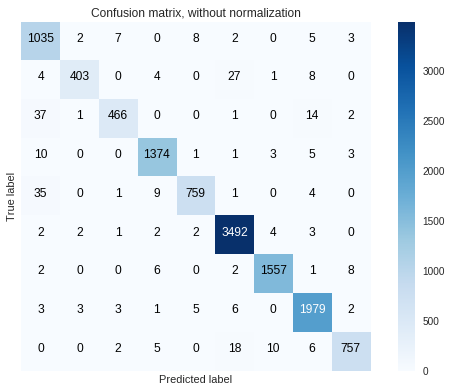

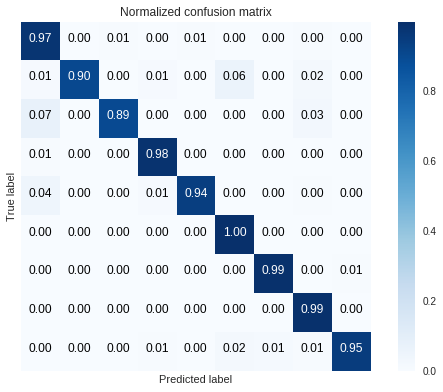

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data_rf, train_labels_rf)
results = rf.predict(test_data_rf)
from sklearn.metrics import confusion_matrix
from itertools import product
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(test_labels_rf, results)
class_names=[]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')


from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(test_labels_rf, results))